In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 시각화 스타일 설정
plt.style.use('ggplot')

# 데이터 불러오기
file_path = 'Student_performance_data _.csv'
data = pd.read_csv(file_path)

# 결측값 확인
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# 결측값이 있는 행의 수
total_missing = missing_values.sum()
print(f"\nTotal number of missing values: {total_missing}")

# 결측값이 있는 행 삭제
data_cleaned = data.dropna()
print(f"\nNumber of rows after dropping missing values: {data_cleaned.shape[0]}")

# 이상치 처리(IQR 방법을 사용하여 이상치를 제거)
Q1 = data_cleaned['StudyTimeWeekly'].quantile(0.25)
Q3 = data_cleaned['StudyTimeWeekly'].quantile(0.75)
IQR = Q3 - Q1
filter = (data_cleaned['StudyTimeWeekly'] >= Q1 - 1.5 * IQR) & (data_cleaned['StudyTimeWeekly'] <= Q3 + 1.5 * IQR)

# 이상치 제거 전후의 데이터프레임 크기 비교 및 이상치 개수 출력
print(f"\nNumber of rows before removing outliers: {data_cleaned.shape[0]}")
data_no_outliers = data_cleaned.loc[filter]
print(f"Number of rows after removing outliers: {data_no_outliers.shape[0]}")

# 이상치의 개수
num_outliers = data_cleaned.shape[0] - data_no_outliers.shape[0]
print(f"\nNumber of outliers removed: {num_outliers}")



Missing values in each column:
Series([], dtype: int64)

Total number of missing values: 0

Number of rows after dropping missing values: 2392

Number of rows before removing outliers: 2392
Number of rows after removing outliers: 2392

Number of outliers removed: 0


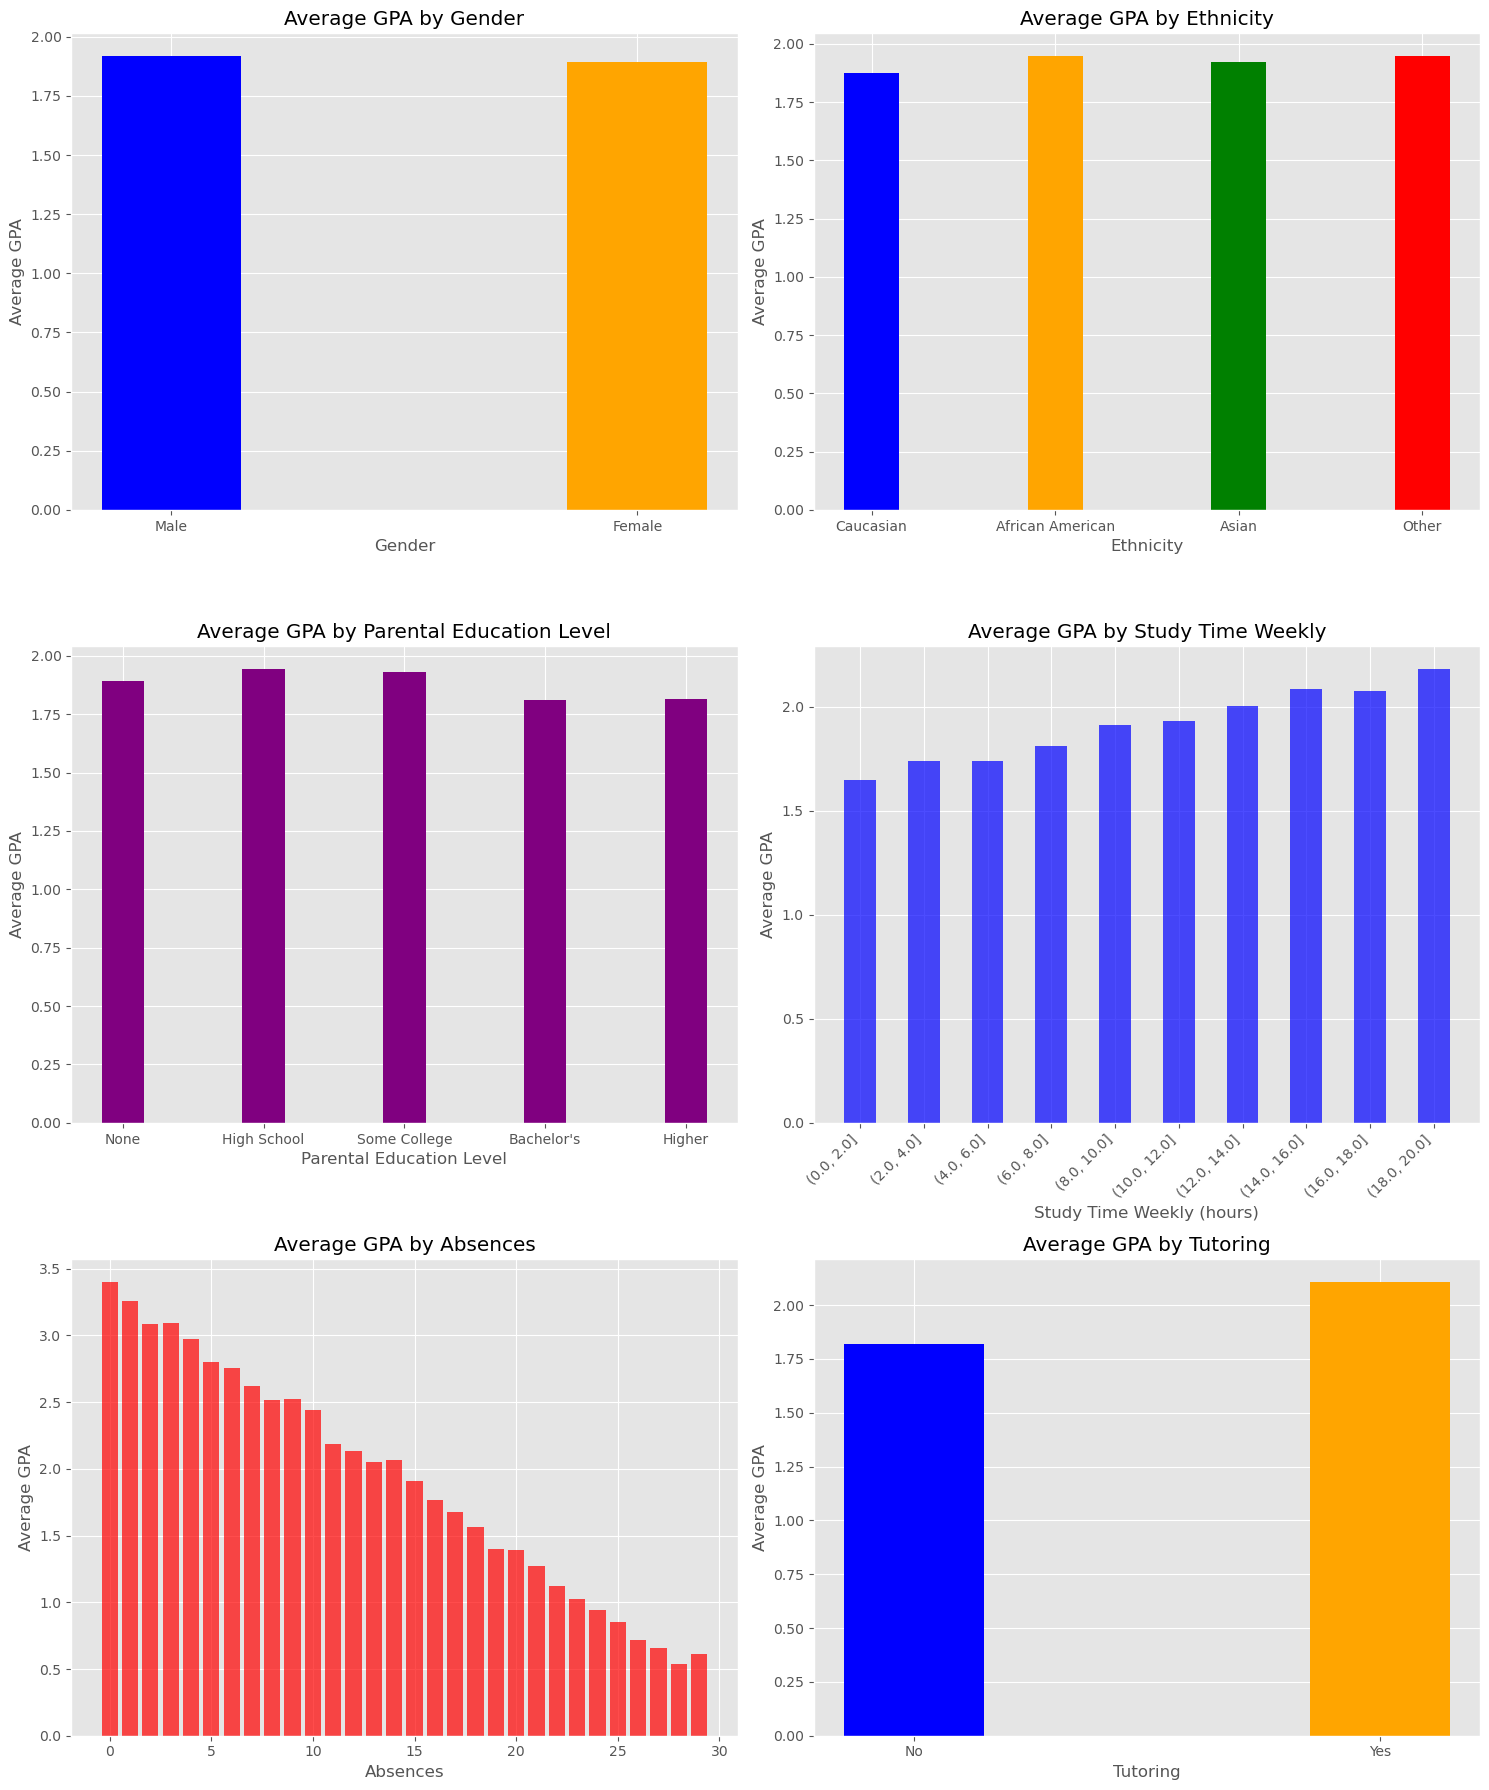

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 성별에 따른 평균 GPA 시각화
gender_gpa = data_no_outliers.groupby('Gender')['GPA'].mean()
axes[0, 0].bar(gender_gpa.index, gender_gpa, color=['blue', 'orange'], width=0.3)
axes[0, 0].set_title('Average GPA by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Average GPA')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Male', 'Female'])

# 인종에 따른 평균 GPA 시각화
ethnicity_gpa = data_no_outliers.groupby('Ethnicity')['GPA'].mean()
axes[0, 1].bar(ethnicity_gpa.index, ethnicity_gpa, color=['blue', 'orange', 'green', 'red'], width=0.3)
axes[0, 1].set_title('Average GPA by Ethnicity')
axes[0, 1].set_xlabel('Ethnicity')
axes[0, 1].set_ylabel('Average GPA')
axes[0, 1].set_xticks([0, 1, 2, 3])
axes[0, 1].set_xticklabels(['Caucasian', 'African American', 'Asian', 'Other'])

# 부모의 교육 수준에 따른 평균 GPA 시각화
parental_education_gpa = data_no_outliers.groupby('ParentalEducation')['GPA'].mean()
axes[1, 0].bar(parental_education_gpa.index, parental_education_gpa, color='purple', width=0.3)
axes[1, 0].set_title('Average GPA by Parental Education Level')
axes[1, 0].set_xlabel('Parental Education Level')
axes[1, 0].set_ylabel('Average GPA')
axes[1, 0].set_xticks([0, 1, 2, 3, 4])
axes[1, 0].set_xticklabels(['None', 'High School', 'Some College', "Bachelor's", 'Higher'])

# 주간 공부 시간에 따른 평균 GPA 시각화
data_no_outliers['StudyTimeBin'] = pd.cut(data_no_outliers['StudyTimeWeekly'], bins=np.arange(0, data_no_outliers['StudyTimeWeekly'].max() + 2, 2))
study_time_gpa = data_no_outliers.groupby('StudyTimeBin')['GPA'].mean()
axes[1, 1].bar(study_time_gpa.index.astype(str), study_time_gpa, color='blue', alpha=0.7, width=0.5)
axes[1, 1].set_title('Average GPA by Study Time Weekly')
axes[1, 1].set_xlabel('Study Time Weekly (hours)')
axes[1, 1].set_ylabel('Average GPA')
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# 결석 횟수에 따른 평균 GPA 시각화
absences_gpa = data_no_outliers.groupby('Absences')['GPA'].mean()
axes[2, 0].bar(absences_gpa.index, absences_gpa, color='red', alpha=0.7)
axes[2, 0].set_title('Average GPA by Absences')
axes[2, 0].set_xlabel('Absences')
axes[2, 0].set_ylabel('Average GPA')

# 과외 여부에 따른 평균 GPA 시각화
tutoring_gpa = data_no_outliers.groupby('Tutoring')['GPA'].mean()
axes[2, 1].bar(tutoring_gpa.index, tutoring_gpa, color=['blue', 'orange'], width=0.3)
axes[2, 1].set_title('Average GPA by Tutoring')
axes[2, 1].set_xlabel('Tutoring')
axes[2, 1].set_ylabel('Average GPA')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [40]:
import scipy.stats as stats

# 성별에 따른 독립 표본 t-검정
gender_gpa_male = data_no_outliers[data_no_outliers['Gender'] == 0]['GPA']
gender_gpa_female = data_no_outliers[data_no_outliers['Gender'] == 1]['GPA']
t_stat_gender, p_val_gender = stats.ttest_ind(gender_gpa_male, gender_gpa_female)
print(f'Gender t-test: t={t_stat_gender}, p={p_val_gender}')
if p_val_gender < 0.05:
    print("결과: 성별은 GPA에 유의미한 차이를 만듭니다.")
else:
    print("결과: 성별은 GPA에 유의미한 차이를 만들지 않습니다.")
print()

# 인종에 따른 일원 분산 분석 (ANOVA)
ethnicity_groups = [data_no_outliers[data_no_outliers['Ethnicity'] == i]['GPA'] for i in data_no_outliers['Ethnicity'].unique()]
f_stat_ethnicity, p_val_ethnicity = stats.f_oneway(*ethnicity_groups)
print(f'Ethnicity ANOVA: F={f_stat_ethnicity}, p={p_val_ethnicity}')
if p_val_ethnicity < 0.05:
    print("결과: 인종은 GPA에 유의미한 차이를 만듭니다.")
else:
    print("결과: 인종은 GPA에 유의미한 차이를 만들지 않습니다.")
print()

# 부모의 교육 수준에 따른 일원 분산 분석 (ANOVA)
education_groups = [data_no_outliers[data_no_outliers['ParentalEducation'] == i]['GPA'] for i in data_no_outliers['ParentalEducation'].unique()]
f_stat_education, p_val_education = stats.f_oneway(*education_groups)
print(f'Parental Education ANOVA: F={f_stat_education}, p={p_val_education}')
if p_val_education < 0.05:
    print("결과: 부모의 교육 수준은 GPA에 유의미한 차이를 만듭니다.")
else:
    print("결과: 부모의 교육 수준은 GPA에 유의미한 차이를 만들지 않습니다.")
print()

# 주간 공부 시간과 GPA 간의 피어슨 상관 분석
corr_study_time, p_val_study_time = stats.pearsonr(data_no_outliers['StudyTimeWeekly'], data_no_outliers['GPA'])
print(f'Study Time Pearson Correlation: r={corr_study_time}, p={p_val_study_time}')
if p_val_study_time < 0.05:
    print("결과: 주간 공부 시간은 GPA와 유의미한 상관 관계가 있습니다.")
else:
    print("결과: 주간 공부 시간은 GPA와 유의미한 상관 관계가 없습니다.")
print()
    
# 결석 횟수와 GPA 간의 피어슨 상관 분석
corr_absences, p_val_absences = stats.pearsonr(data_no_outliers['Absences'], data_no_outliers['GPA'])
print(f'Absences Pearson Correlation: r={corr_absences}, p={p_val_absences}')
if p_val_absences < 0.05:
    print("결과: 결석 횟수는 GPA와 유의미한 상관 관계가 있습니다.")
else:
    print("결과: 결석 횟수는 GPA와 유의미한 상관 관계가 없습니다.")
print()

# 과외 여부에 따른 독립 표본 t-검정
tutoring_gpa_no = data_no_outliers[data_no_outliers['Tutoring'] == 0]['GPA']
tutoring_gpa_yes = data_no_outliers[data_no_outliers['Tutoring'] == 1]['GPA']
t_stat_tutoring, p_val_tutoring = stats.ttest_ind(tutoring_gpa_no, tutoring_gpa_yes)
print(f'Tutoring t-test: t={t_stat_tutoring}, p={p_val_tutoring}')
if p_val_tutoring < 0.05:
    print("결과: 과외 여부는 GPA에 유의미한 차이를 만듭니다.")
else:
    print("결과: 과외 여부는 GPA에 유의미한 차이를 만들지 않습니다.")
print()

Gender t-test: t=0.6531957576950806, p=0.5136929146255127
결과: 성별은 GPA에 유의미한 차이를 만들지 않습니다.

Ethnicity ANOVA: F=0.9581218945870755, p=0.4115850271925584
결과: 인종은 GPA에 유의미한 차이를 만들지 않습니다.

Parental Education ANOVA: F=1.8081303390687973, p=0.12448408765780827
결과: 부모의 교육 수준은 GPA에 유의미한 차이를 만들지 않습니다.

Study Time Pearson Correlation: r=0.1792751268560882, p=1.000201125924497e-18
결과: 주간 공부 시간은 GPA와 유의미한 상관 관계가 있습니다.

Absences Pearson Correlation: r=-0.9193135764208643, p=0.0
결과: 결석 횟수는 GPA와 유의미한 상관 관계가 있습니다.

Tutoring t-test: t=-7.170424050973337, p=9.923854014273352e-13
결과: 과외 여부는 GPA에 유의미한 차이를 만듭니다.



In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 특성 (Features)와 타깃 변수 (Target) 분리
X = data_no_outliers[['StudyTimeWeekly', 'Absences', 'Tutoring']]
y = data_no_outliers['GPA']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 세트와 테스트 세트 분리
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# 모델 리스트
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('SVR', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# 모델 성능 평가
results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    cv_score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    results[name] = {'MSE': mse, 'R²': r2, 'MAE': mae, 'CV Score': cv_score}

# 결과 출력
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"R²: {metrics['R²']}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Cross-Validation Score: {metrics['CV Score']}")
    print('-' * 30)


Model: Linear Regression
Mean Squared Error (MSE): 0.09079158047972728
R²: 0.8921757930956475
Mean Absolute Error (MAE): 0.23890853344433577
Cross-Validation Score: -0.08739031002824306
------------------------------
Model: Random Forest
Mean Squared Error (MSE): 0.11055213875840764
R²: 0.868708126676274
Mean Absolute Error (MAE): 0.2610620820438016
Cross-Validation Score: -0.11311500766488829
------------------------------
Model: SVR
Mean Squared Error (MSE): 0.09083776815884216
R²: 0.892120940543869
Mean Absolute Error (MAE): 0.239597612289727
Cross-Validation Score: -0.08852140998113188
------------------------------
Model: Decision Tree
Mean Squared Error (MSE): 0.17141115674132898
R²: 0.7964318725091659
Mean Absolute Error (MAE): 0.32477503017671117
Cross-Validation Score: -0.17350101563564918
------------------------------
Model: XGBoost
Mean Squared Error (MSE): 0.11503949606973274
R²: 0.8633789349094436
Mean Absolute Error (MAE): 0.2687877552814513
Cross-Validation Score: -0.11

                        MSE        R²       MAE  CV Score
Linear Regression  0.090792  0.892176  0.238909 -0.087390
Random Forest      0.110552  0.868708  0.261062 -0.113115
SVR                0.090838  0.892121  0.239598 -0.088521
Decision Tree      0.171411  0.796432  0.324775 -0.173501
XGBoost            0.115039  0.863379  0.268788 -0.111995


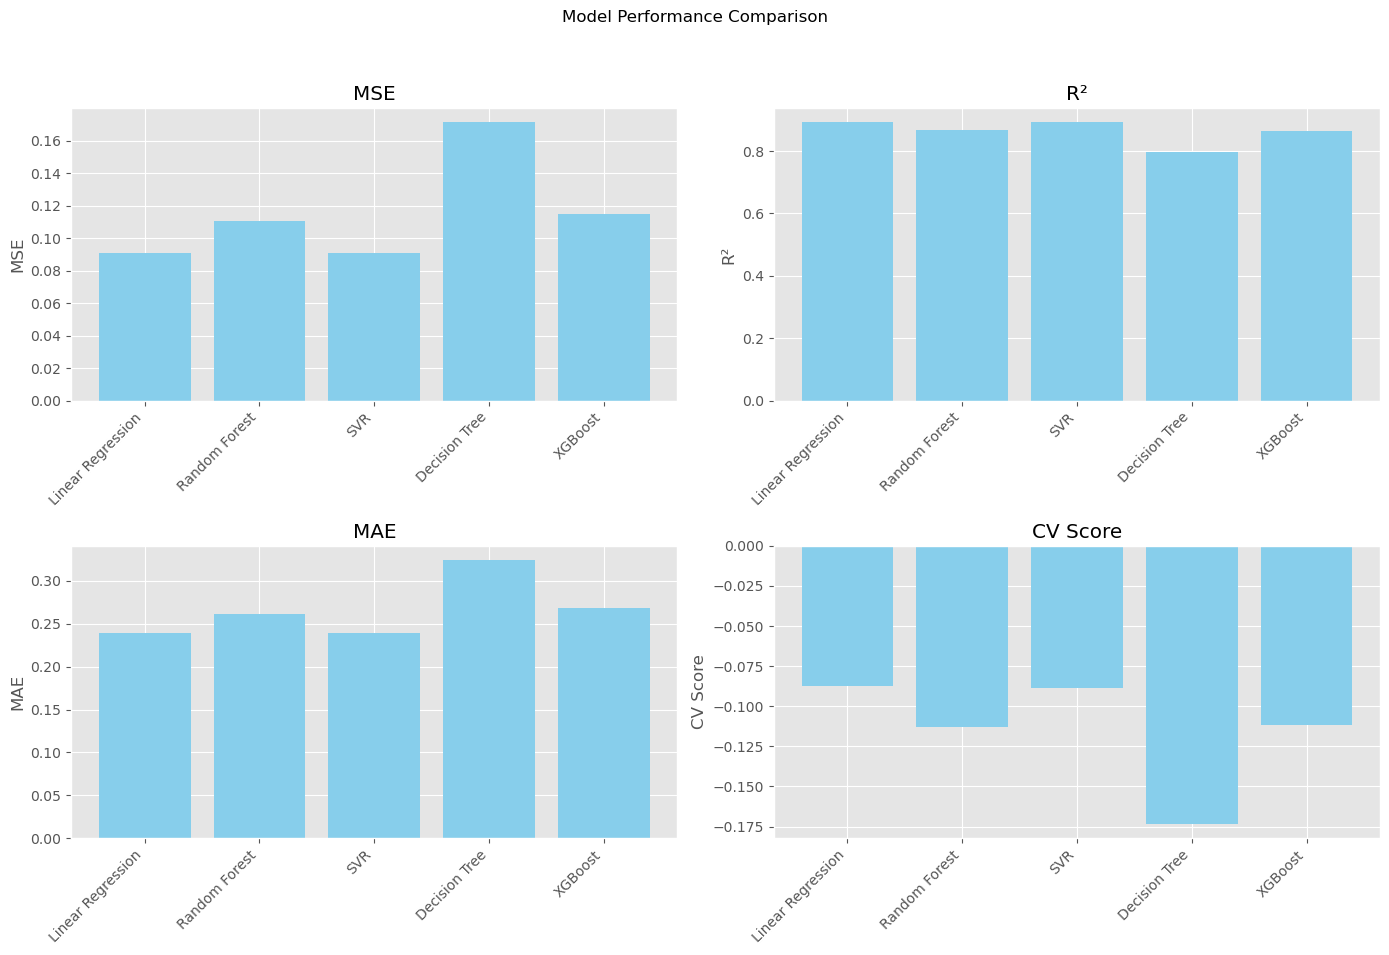

In [43]:
# 모델 성능 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results).T

# 결과 데이터프레임 확인
print(results_df)

# 평가 지표 시각화 함수
def plot_metrics(metrics_df):
    metrics = metrics_df.columns
    num_metrics = len(metrics)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
    fig.suptitle('Model Performance Comparison')
    
    axes = axes.flatten()  # 2x2 배열을 1차원 배열로 변환
    
    for i, metric in enumerate(metrics):
        axes[i].bar(metrics_df.index, metrics_df[metric], color='skyblue')
        axes[i].set_title(metric)
        axes[i].set_xticks(range(len(metrics_df.index)))
        axes[i].set_xticklabels(metrics_df.index, rotation=45, ha='right')
        axes[i].set_ylabel(metric)
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 시각화 함수 호출
plot_metrics(results_df)